<span style='color:pink; font-weight: bold;'>Classification Task</span>

1-Load the libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix




2-Load the dataset:

In [4]:
col_names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]# column names
magic_data = pd.read_csv("magic04.data", header=None, names=col_names) # read in the data
print(len(magic_data))

19020


3-Balance the Dataset:

In [5]:
g_events = magic_data[magic_data['class'] == 'g']
h_events = magic_data[magic_data['class'] == 'h']
print("The length of gamma events =",len(g_events))
print("The length of the hadrons events =",len(h_events))

print("After the balancing:")
balanced_g = g_events.sample(n=len(h_events), random_state=42)  #It balances the data by taking the same number of g and h events and the random subset will be selected everytime
print("The length of gamma events =",len(balanced_g))
balanced_data = pd.concat([balanced_g, h_events]).sample(frac=1, random_state=42) #It concatenates the balanced_g and h_events and shuffles the data
print("The length of the total events =",len(balanced_data))


The length of gamma events = 12332
The length of the hadrons events = 6688
After the balancing:
The length of gamma events = 6688
The length of the total events = 13376


4-Encode the Labels:

In [6]:
label_encoder = LabelEncoder() #It encodes the class labels as ML algos cannot work with tesxt data directly
balanced_data['class'] = label_encoder.fit_transform(balanced_data['class']) #It encodes the class labels


5-Separate features and target variable:

In [7]:
x = balanced_data.drop('class', axis=1) #It drops the class column and takes the rest of the columns as the feature variables
y = balanced_data['class'] # It takes the class column as the target variable


6-Split the data into training, validation and testing:

In [8]:
x_train, x_temp = train_test_split(x, test_size=0.3, random_state=42, stratify=y) #It splits the data into training and testing data and stratify parameter makes sure that the class distribution is the same in the training and testing data
y_train, y_temp = train_test_split(y, test_size=0.3, random_state=42, stratify=y) # It splits the data into training and testing data
x_val, x_test = train_test_split(x_temp, test_size=0.5, random_state=42, stratify=y_temp) #It splits the data into validation and testing data
y_val, y_test = train_test_split(y_temp, test_size=0.5, random_state=42, stratify=y_temp) # It splits the data into validation and testing data 
print("The length of the training data =",len(x_train))
print("The length of the validation data =",len(x_val))
print("The length of the testing data =",len(x_test))


The length of the training data = 9363
The length of the validation data = 2006
The length of the testing data = 2007


7-Standardize the feature data (x_train,x_val,x_test):

In [9]:
scaler = StandardScaler() #It scales the data by removing the mean and scaling to unit variance to ensure all features contribute equally to the result
x_train = scaler.fit_transform(x_train) #It fits the training data and then transforms it
x_val = scaler.transform(x_val) #It transforms the validation data
x_test = scaler.transform(x_test) #It transforms the testing data
print("The standardized training data",x_train)
print("The standardized validation data",x_val)
print("The standardized Testing data",x_test)


The standardized training data [[-0.67465295  0.03494    -0.12297294 ... -0.70774943 -0.09676915
  -0.97007624]
 [-0.71885657 -0.30185083 -0.32184533 ...  0.72548882 -0.46537291
   0.76548842]
 [-0.84905116 -0.60468813 -1.11838601 ...  0.27308091  0.0209516
   0.68958646]
 ...
 [ 3.70106056  3.39132219  1.95509637 ... -1.81026703  2.17154426
   0.94663758]
 [ 0.10815243  0.53609595  0.50706992 ...  0.55367925 -0.06791249
   1.00472735]
 [ 2.38392593  0.02938362 -0.22325004 ...  0.74532998 -0.07173104
   0.76403464]]
The standardized validation data [[-0.65771323 -0.63338809 -0.50137707 ... -0.40992857 -0.33840881
   0.64131963]
 [-0.22172517 -0.32994037  0.42171877 ...  0.38791206 -1.00089986
   0.15473421]
 [-0.66727821 -0.5987376  -0.31091366 ...  0.29210834 -1.03024732
  -0.12190625]
 ...
 [ 1.54611287  1.19668548  1.73625265 ...  1.96495978 -0.96678572
   2.4096458 ]
 [ 0.59984556  0.73806759  1.29814477 ... -1.42624273  0.05726689
   2.60902779]
 [-0.16490473 -0.67235968 -0.217784


8-Create the KNN (K Neighbor Classifier):

In [10]:
def evaluate_knn(k, x_train, y_train, x_val, y_val):
    knn_model = KNeighborsClassifier(n_neighbors=k) #It creates a KNN model with the number of neighbors as k
    knn_model.fit(x_train, y_train) #It fits the model on the training data
    y_pred = knn_model.predict(x_val) #It predicts the class labels for the validation data

    # Calculate performance metrics
    accuracy = accuracy_score(y_val, y_pred) 
    precision = precision_score(y_val, y_pred) 
    recall = recall_score(y_val, y_pred) 
    f1 = f1_score(y_val, y_pred) 
    cm = confusion_matrix(y_val, y_pred)

    return accuracy, precision, recall, f1, cm

9-Displaying the Matrices:

In [11]:
def display_metrics(k, accuracy, precision, recall, f1, cm): #It displays the metrics of the model
    print("*" * 36)
    print(f"\n    **K = {k}**") 
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print("*" * 36)


10-Displaying the accuracy,precision,recall ,and f1 for each k value:

In [12]:
def plot_metrics(k_values, metrics):
   
    # Extract the metrics for each k
    accuracies = [metrics[k]['accuracy'] for k in k_values] 
    precisions = [metrics[k]['precision'] for k in k_values] 
    recalls = [metrics[k]['recall'] for k in k_values] 
    f1_scores = [metrics[k]['f1'] for k in k_values] 
    
    # Plot the metrics
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o', label='Accuracy') 
    plt.plot(k_values, precisions, marker='o', label='Precision')
    plt.plot(k_values, recalls, marker='o', label='Recall')
    plt.plot(k_values, f1_scores, marker='o', label='F1-Score')
    
    # Add labels and title
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Score')
    plt.title('K-NN Performance Metrics for Different k Values')
    plt.legend()
    plt.grid(True)
    plt.show()


11-Displaying the Confusion Matrix for all k values:

In [13]:
def plot_confusion_matrix(cm, k):
   # Plot the confusion matrix
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdPu)
    plt.colorbar()
    plt.xticks([0, 1], ["g", "h"])
    plt.yticks([0, 1], ["g", "h"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix (K = {k})")
    plt.show()

12-Evaluate the KNN Models:

In [14]:
def test_knn(k_values, x_train, y_train, x_val, y_val):
    # Evaluate K-NN models for different k-values
    metrics = {}
    accuracy_scores = []

    print("\n*** K-NN Performance Evaluation ***")
    for k in k_values:
        # Evaluate K-NN model
        accuracy, precision, recall, f1, cm = evaluate_knn(k, x_train, y_train, x_val, y_val)

        # Store metrics
        metrics[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': cm
        }

        # Display performance metrics
        display_metrics(k, accuracy, precision, recall, f1, cm)

        # Plot confusion matrix for the current k
        plot_confusion_matrix(cm, k)

    # Plot metrics for all k-values
    plot_metrics(k_values, metrics)

    return metrics


*** K-NN Performance Evaluation ***
************************************

    **K = 1**
Accuracy:  0.7976
Precision: 0.8199
Recall:    0.7627
F1 Score:  0.7903
Confusion Matrix:
[[835 168]
 [238 765]]
************************************


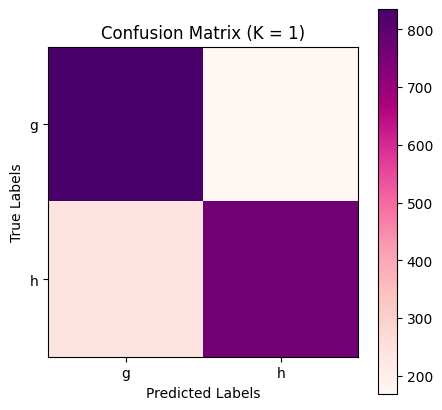

************************************

    **K = 3**
Accuracy:  0.8121
Precision: 0.8533
Recall:    0.7537
F1 Score:  0.8004
Confusion Matrix:
[[873 130]
 [247 756]]
************************************


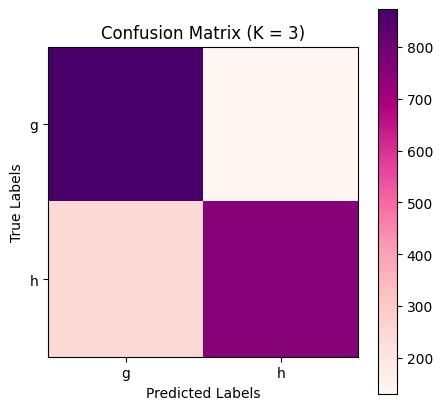

************************************

    **K = 5**
Accuracy:  0.8170
Precision: 0.8573
Recall:    0.7607
F1 Score:  0.8061
Confusion Matrix:
[[876 127]
 [240 763]]
************************************


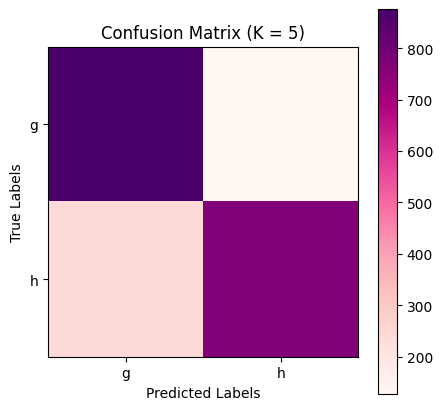

************************************

    **K = 7**
Accuracy:  0.8180
Precision: 0.8709
Recall:    0.7468
F1 Score:  0.8041
Confusion Matrix:
[[892 111]
 [254 749]]
************************************


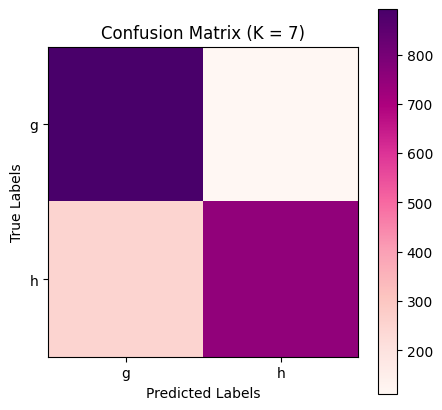

************************************

    **K = 9**
Accuracy:  0.8161
Precision: 0.8729
Recall:    0.7398
F1 Score:  0.8009
Confusion Matrix:
[[895 108]
 [261 742]]
************************************


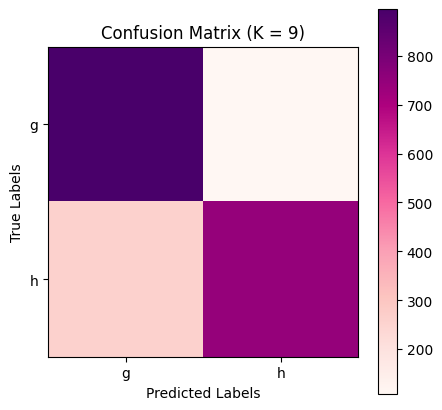

************************************

    **K = 11**
Accuracy:  0.8220
Precision: 0.8791
Recall:    0.7468
F1 Score:  0.8075
Confusion Matrix:
[[900 103]
 [254 749]]
************************************


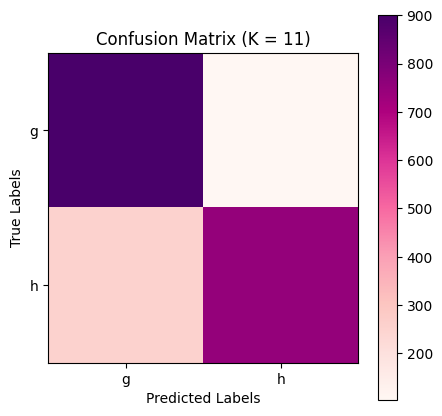

************************************

    **K = 13**
Accuracy:  0.8156
Precision: 0.8710
Recall:    0.7408
F1 Score:  0.8006
Confusion Matrix:
[[893 110]
 [260 743]]
************************************


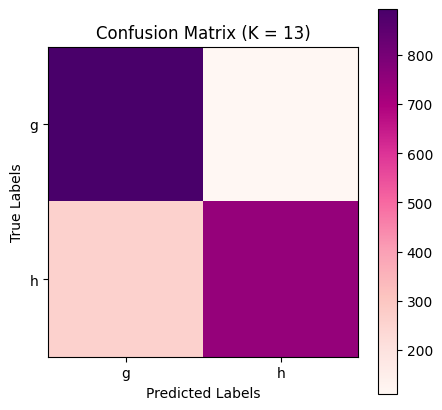

************************************

    **K = 15**
Accuracy:  0.8156
Precision: 0.8728
Recall:    0.7388
F1 Score:  0.8002
Confusion Matrix:
[[895 108]
 [262 741]]
************************************


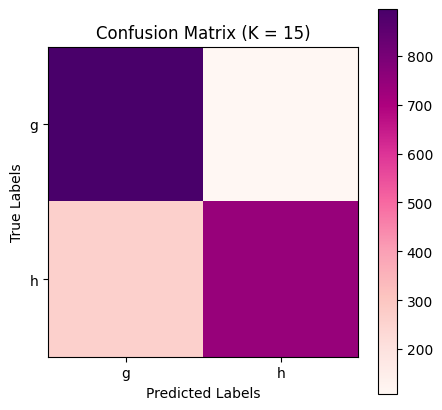

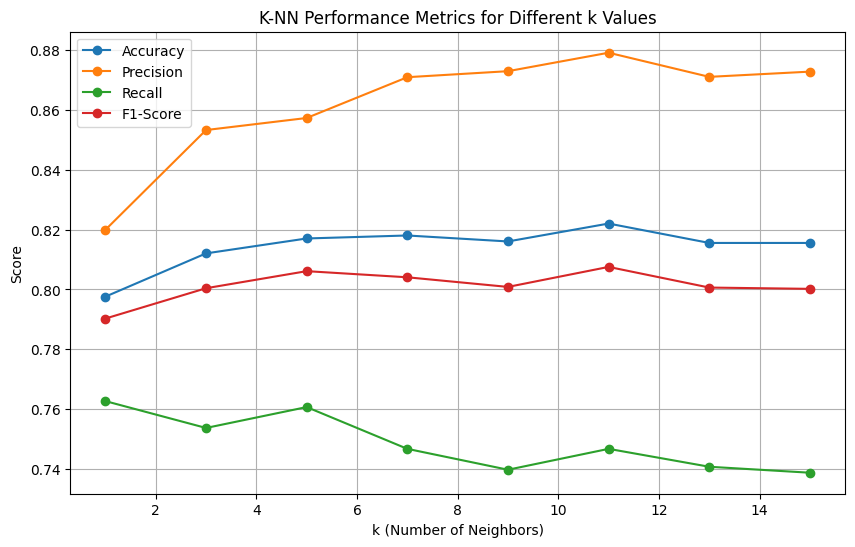

In [15]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15] #It takes the values of k
metrics = test_knn(k_values, x_train, y_train, x_val, y_val) #It tests the KNN model for different values of k

13-The Best K value:

In [16]:
best_k = max(metrics.keys(), key=lambda k: metrics[k]['accuracy']) #It selects the best k value based on the accuracy
best_accuracy = metrics[best_k]['accuracy'] #It selects the best accuracy based on the best k value
print(f"Best k value: {best_k} with accuracy: {best_accuracy:.4f}")

Best k value: 11 with accuracy: 0.8220


14-Comments:

<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: Blue;">
        <p>for k=1:</p>
        <ul>
            <li>Accuracy (0.7976): This indicates that approximately 79.76% of the predictions made by the model are correct.</li></p>
            <li>Precision (0.8199): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 81.99% of the time.</li></p>
            <li>Recall (0.7627): This indicates that the model correctly identifies 76.27% of all actual positive cases.</li></p>
            <li>F1 Score (0.7903): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns.</p></p></p> A score of 0.7903 suggests a good balance between precision and recall.</li></p>
        </ul>
        <p>Confusion Matrix:</p>
        <ul>
            <li>True Positives (835): The number of correct positive predictions.</li></p>
            <li>False Positives (168): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (238): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (765): The number of correct negative predictions.</li></p>
        </ul>
    </div>
</div>


<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: BLue;">
        <p>for k=3:</p>
        <ul>
            <li>Accuracy (0.8121): This indicates that approximately 81.21% of the predictions made by the model are correct.</li></p>
            <li>Precision (0.8533): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 85.33% of the time.</li></p>
            <li>Recall (0.7537): This indicates that the model correctly identifies 75.37% of all actual positive cases.</li></p>
            <li>F1 Score (0.8004): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns. </p></p></p>A score of 0.8004 suggests a good balance between precision and recall.</li></p>
        </ul>
        <p>Confusion Matrix:</p>
        <ul>
            <li>True Positives (873): The number of correct positive predictions.</li></p>
            <li>False Positives (130): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (247): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (756): The number of correct negative predictions.</li></p>
        </ul>
    </div>
</div>

<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: blue;">
        <p>for k=5:</p>
        <ul>
            <li>Accuracy (0.8170): This indicates that approximately 81.70% of the predictions made by the model are correct.</li></p></p>
            <li>Precision (0.8573): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 85.73% of the time.</li></p></p>
            <li>Recall (0.7607): This indicates that the model correctly identifies 76.07% of all actual positive cases.</li></p></p>
            <li>F1 Score (0.8061): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns.</p></p></p></p> A score of 0.8061 suggests a good balance between precision and recall.</li></p></p>
        </ul>
        </p><p>Confusion Matrix:</p></p>
        <ul>
            <li>True Positives (876): The number of correct positive predictions.</li></p>
            <li>False Positives (127): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (240): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (763): The number of correct negative predictions.</li>
        </ul>
    </div>
</div>

<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: Blue;">
        <p>for k=7:</p>
        <ul>
            <li>Accuracy (0.8180): This indicates that approximately 81.80% of the predictions made by the model are correct.</li></p>
            <li>Precision (0.8709): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 87.09% of the time.</li></p>
            <li>Recall (0.7468): This indicates that the model correctly identifies 74.68% of all actual positive cases.</li></p>
            <li>F1 Score (0.8041): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns. </p></p></p>A score of 0.8041 suggests a good balance between precision and recall.</li></p>
        </ul>
        <p>Confusion Matrix:</p>
        <ul>
            <li>True Positives (892): The number of correct positive predictions.</li></p>
            <li>False Positives (111): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (254): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (749): The number of correct negative predictions.</li></p>
        </ul>
    </div>
</div>

<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: Blue;">
        <p>for k=9:</p>
        <ul>
            <li>Accuracy (0.8161): This indicates that approximately 81.61% of the predictions made by the model are correct.</li></p>
            <li>Precision (0.8729): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 87.29% of the time.</li></p>
            <li>Recall (0.7398): This indicates that the model correctly identifies 73.98% of all actual positive cases.</li></p>
            <li>F1 Score (0.8009): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns. </p></p></p>A score of 0.8009 suggests a good balance between precision and recall.</li></p>
        </ul>
        <p>Confusion Matrix:</p>
        <ul>
            <li>True Positives (895): The number of correct positive predictions.</li></p>
            <li>False Positives (108): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (261): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (742): The number of correct negative predictions.</li></p>
        </ul>
    </div>
</div>

<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: Blue;">
        <p>for k=11:</p>
        <ul>
            <li>Accuracy (0.8220): This indicates that approximately 82.20% of the predictions made by the model are correct.</li></p>
            <li>Precision (0.8791): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 87.91% of the time.</li></p>
            <li>Recall (0.7468): This indicates that the model correctly identifies 74.68% of all actual positive cases.</li></p>
            <li>F1 Score (0.8075): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns.</p></p></p> A score of 0.8075 suggests a good balance between precision and recall.</li></p>
        </ul>
        <p>Confusion Matrix:</p>
        <ul>
            <li>True Positives (900): The number of correct positive predictions.</li></p>
            <li>False Positives (103): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (254): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (749): The number of correct negative predictions.</li></p>
        </ul>
    </div>
</div>

<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: Blue;">
        <p>for k=13:</p>
        <ul>
            <li>Accuracy (0.8156): This indicates that approximately 81.56% of the predictions made by the model are correct.</li></p></p>
            <li>Precision (0.8710): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 87.10% of the time.</li></p></p>
            <li>Recall (0.7408): This indicates that the model correctly identifies 74.08% of all actual positive cases.</li></p></p>
            <li>F1 Score (0.8006): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns.</p></p></p> A score of 0.8006 suggests a good balance between precision and recall.</li></p>
        </ul>
        <p>Confusion Matrix:</p>
        <ul>
            <li>True Positives (893): The number of correct positive predictions.</li></p>
            <li>False Positives (110): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (260): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (743): The number of correct negative predictions.</li>
        </ul>
    </div>
</div>

<div class="alert alert-block alert-info">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: Blue;">
        <p>for k=15:</p>
        <ul>
            <li>Accuracy (0.8156): This indicates that approximately 81.56% of the predictions made by the model are correct.</li></p>
            <li>Precision (0.8728): This indicates that when the model predicts a positive class (e.g., 'g'), it is correct about 87.28% of the time.</li></p>
            <li>Recall (0.7388): This indicates that the model correctly identifies 73.88% of all actual positive cases.</li></p>
            <li>F1 Score (0.8002): This is the harmonic mean of precision and recall, providing a single metric that balances both concerns.</p></p></p> A score of 0.8002 suggests a good balance between precision and recall.</li></p>
        </ul>
        <p>Confusion Matrix:</p>
        <ul>
            <li>True Positives (895): The number of correct positive predictions.</li></p>
            <li>False Positives (108): The number of incorrect positive predictions.</li></p>
            <li>False Negatives (262): The number of incorrect negative predictions.</li></p>
            <li>True Negatives (741): The number of correct negative predictions.</li></p>
        </ul>
    </div>
</div>

15-Tradeoffs Between the models:

<div class="alert alert-block alert-warning">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: orange;">
        <p>When choosing the optimal value of k for a K-Nearest Neighbors (K-NN) classifier, there are several tradeoffs to consider:</p>
        <ul>
            <li><strong>Bias-Variance Tradeoff:</strong></p></p>
                <ul>
                    <li><strong>Low k (e.g., k = 1):</strong></p>
                        <ul>
                            <li><strong>Low Bias:</strong> The model can capture more details and is more flexible.</li></p>
                            <li><strong>High Variance:</strong> The model is more sensitive to noise in the training data, leading to overfitting.</li></p>
                        </ul>
                    </li>
                    <li><strong>High k (e.g., k = 15):</strong></p></p>
                        <ul>
                            <li><strong>High Bias:</strong> The model is less flexible and may miss some details.</li></p>
                            <li><strong>Low Variance:</strong> The model is more stable and less sensitive to noise, leading to underfitting.</li></p>
                        </ul>
                    </li>
                </ul>
            </li>
            <li><strong>Accuracy:</strong></p></p>
             Generally, as k increases, the accuracy tends to stabilize.</p></p> However, too high a value of k can lead to underfitting, where the model is too simple to capture the underlying patterns in the data.</li></p>
            <li><strong>Precision and Recall:</strong></p></p>
                <ul>
                    <li><strong>Precision:</strong></p></p>
                     Higher values of k tend to increase precision, as the model becomes more conservative in making positive predictions, reducing false positives.</li></p>
                    <li><strong>Recall:</strong> Lower values of k tend to increase recall, as the model is more aggressive in making positive predictions, reducing false negatives.</li></p>
                </ul>
            </li>
            <li><strong>F1 Score:</strong></p></p>
            The F1 score balances precision and recall.</p></p> The optimal k value should provide a good balance between these two metrics. In this case, k= 11</code> has the highest F1 score, indicating a good balance.</li></p>
            <li><strong>Confusion Matrix:</strong></p></p></p>
             The confusion matrix provides insights into the types of errors the model is making. </p></p></p>For example, with lower k values, you might see more false positives and false negatives, while higher k values might reduce these errors but increase the number of</p></p> true negatives.</li></p>
        </ul>
        <p><strong>Specific Tradeoffs Observed:</strong></p></p></p>
        <ul>
            <li><strong>k = 1:</strong></p></p>
                <ul>
                    <li><strong>Pros:</strong> High recall (0.7627), capturing more true positives.</li></p></p>
                    <li><strong>Cons:</strong> Lower precision (0.8199) and higher variance, leading to more false positives.</li></p></p>
                </ul>
            </li>
            <li><strong>k = 3:</strong></p></p>
                <ul>
                    <li><strong>Pros:</strong> Improved precision (0.8533) and balanced recall (0.7537).</li></p></p>
                    <li><strong>Cons:</strong> Slightly lower recall compared to k = 1.</li></p></p>
                </ul>
            </li>
            <li><strong>k = 5:</strong></p></p>
                <ul>
                    <li><strong>Pros:</strong> Good balance with high precision (0.8573) and recall (0.7607).</li></p></p></p>
                    <li><strong>Cons:</strong> Slightly lower accuracy compared to higher k values.</li></p></p></p>
                </ul>
            </li>
            <li><strong>k = 11:</strong></p></p>
                <ul>
                    <li><strong>Pros:</strong> Highest accuracy (0.8220), highest precision (0.8791), and highest F1 score (0.8075).</li></p></p></p>
                    <li><strong>Cons:</strong> Slightly lower recall (0.7468) compared to k = 5.</li></p></p></p>
                </ul>
            </li>
            <li><strong>k = 15:</strong></p></p>
                <ul>
                    <li><strong>Pros:</strong> High precision (0.8728) and stable performance.</li></p></p></p>
                    <li><strong>Cons:</strong> Lower recall (0.7388) and slightly lower F1 score (0.8002) compared to k = 11.</li></p></p></p>
                </ul>
            </li>
        </ul>
    </div>
</div>

16- The Conclusion:

 <div class="alert alert-block alert-danger">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: red;">
 <p>The choice of k involves balancing the tradeoffs between bias and variance, precision and recall, and overall model stability. </p></p></p></p>
        In this case, k = 11 provides the best overall performance, but the specific tradeoffs should be considered based on the application's requirements and the importance of different metrics.</p></p>
    </div>
</div>